In [18]:
%load_ext autoreload

%autoreload 2
from src import ODE_euler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [19]:
%autoreload 2
from src import ODE_euler, ODE_euler_nth
f = lambda t, y: -5*y + 5*t**2 + 2*t
y_t0 = 1/3

a = 0
b = 1

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys

[0.3333333333333333,
 0.16666666666666666,
 0.10833333333333334,
 0.11416666666666667,
 0.16208333333333336,
 0.2410416666666667,
 0.34552083333333333,
 0.4727604166666667,
 0.6213802083333333,
 0.7906901041666666,
 0.9803450520833332]

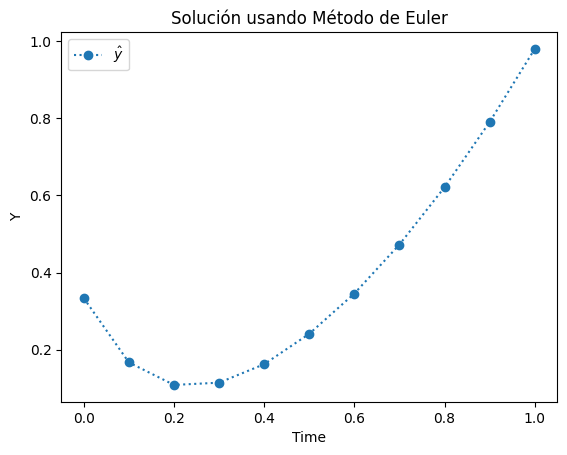

In [20]:
import matplotlib.pyplot as plt

plt.plot(ts, ys, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Euler")
plt.legend()
plt.show()

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler y el de Taylor de 2do orden en una misma gráfica.



In [21]:
from math import exp

y_real = lambda t: t**2 + 1 / 3 * exp(-5 * t)

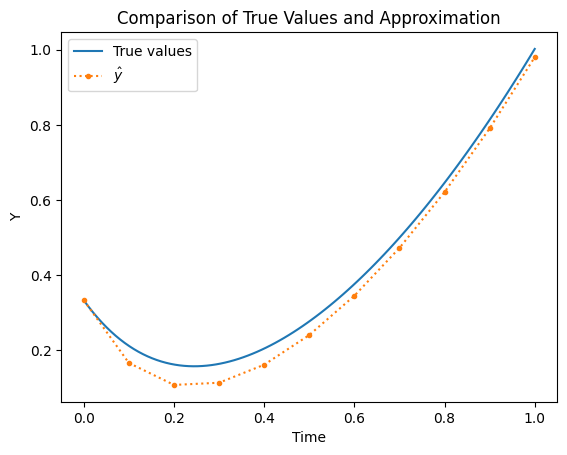

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# True values
t_true = np.linspace(a, b, 100)
y_true = [y_real(t) for t in t_true]
plt.plot(t_true, y_true, label="True values")

# Approximation
plt.plot(ts, ys, marker=".", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Comparison of True Values and Approximation")
plt.legend()
plt.show()

In [23]:
# Calcular error relativo

# Método de Taylor

In [24]:
%autoreload 2
from src import ODE_euler_nth

# ys_nth,ts_nth, h = ODE_euler_nth() # COMPLETAR
# ys_nth


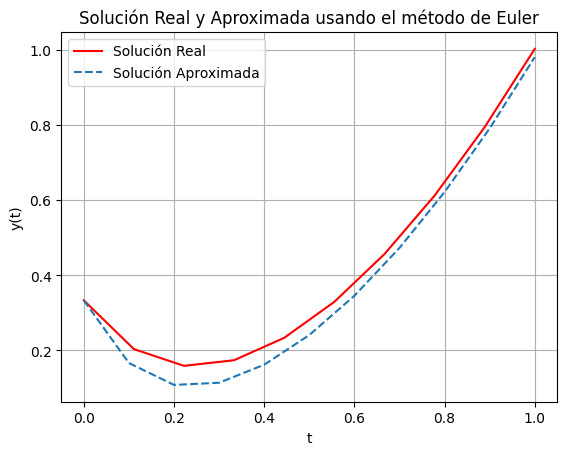

In [25]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Funcion Real
def f_real(t: float) -> float:
    return t**2 + 1 / 3 * np.exp(-5 * t)

# Parámetros del problema
#t = np.linspace(0, 2, 100)
#y_t0_real = t**2 + 1 / 3 * np*exp(-5 * t)

#ys_real, ts_real, h_real = ODE_euler(a=0, b=2, f=f_real, y_t0=1/3, N=10)
ts_real = np.linspace(0, 1, 10)
ys_real = f_real(ts_real)


# Funcion Aproximada
def f_approx(t: float, y: float) -> float:
    return -5*y + 5*t**2 + 2*t 

ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=0, b=1, f=f_approx, y_t0=1/3, N=10)

# Plotting both solutions
plt.plot(ts_real, ys_real, label='Solución Real', color='red')
plt.plot(ts_aproximado, ys_aproximado,linestyle = '--', label='Solución Aproximada')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Real y Aproximada usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()

Error relativo promedio: 0.1291


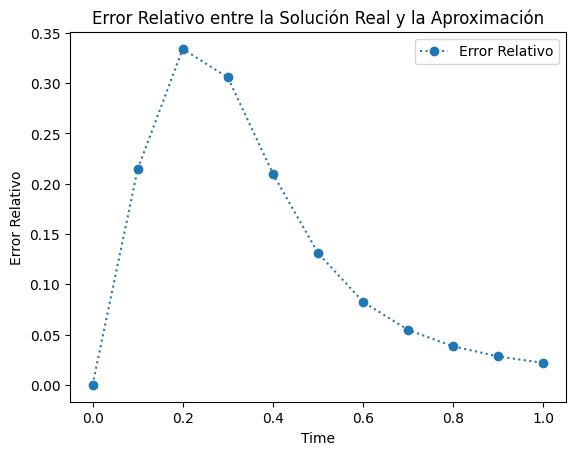

t=0.00, y_real=0.3333, y_aprox=0.3333, error_relativo=0.0000
t=0.10, y_real=0.2122, y_aprox=0.1667, error_relativo=0.2145
t=0.20, y_real=0.1626, y_aprox=0.1083, error_relativo=0.3339
t=0.30, y_real=0.1644, y_aprox=0.1142, error_relativo=0.3055
t=0.40, y_real=0.2051, y_aprox=0.1621, error_relativo=0.2098
t=0.50, y_real=0.2774, y_aprox=0.2410, error_relativo=0.1309
t=0.60, y_real=0.3766, y_aprox=0.3455, error_relativo=0.0825
t=0.70, y_real=0.5001, y_aprox=0.4728, error_relativo=0.0546
t=0.80, y_real=0.6461, y_aprox=0.6214, error_relativo=0.0383
t=0.90, y_real=0.8137, y_aprox=0.7907, error_relativo=0.0283
t=1.00, y_real=1.0022, y_aprox=0.9803, error_relativo=0.0219


In [27]:
# Calcular la solución real en los puntos de la aproximación
y_real_approx = [y_real(t) for t in ts]

# Calcular el error relativo
error_relativo = np.abs((np.array(y_real_approx) - np.array(ys)) / np.array(y_real_approx))

# Calcular el error relativo promedio
error_relativo_promedio = np.sum(error_relativo) / len(error_relativo)
print(f"Error relativo promedio: {error_relativo_promedio:.4f}")
# Graficar el error relativo
plt.plot(ts, error_relativo, marker="o", linestyle=":", label="Error Relativo")
plt.xlabel("Time")
plt.ylabel("Error Relativo")
plt.title("Error Relativo entre la Solución Real y la Aproximación")
plt.legend()
plt.show()

# Imprimir el error relativo
for t, y_r, y_a, e_r in zip(ts, y_real_approx, ys, error_relativo):
    print(f"t={t:.2f}, y_real={y_r:.4f}, y_aprox={y_a:.4f}, error_relativo={e_r:.4f}")